
# Question 7 — Linear Regression: Normal Equation vs Gradient Descent (from scratch)

**Dataset**: Generate 200 samples with \(x \sim \mathcal{U}[0,5]\) and \(y = 3 + 4x + \varepsilon\), where \(\varepsilon \sim \mathcal{N}(0,1)\).  
**Goal**: Compare the **closed‑form** solution (Normal Equation) with **Gradient Descent** on the same data.

**Deliverables in this notebook**
- Generate the dataset and plot the raw data.
- Compute \(\theta = (X^\top X)^{-1} X^\top y\); print intercept & slope; plot fitted line.
- Implement Gradient Descent from scratch starting \(\theta=[0,0]\), \(\eta=0.05\), 1000 iters; plot loss curve; print final params.
- Plot raw data with **both** fitted lines on a single chart.
- End with a short (2–3 sentence) commentary.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)


## 1) Generate dataset and plot raw data

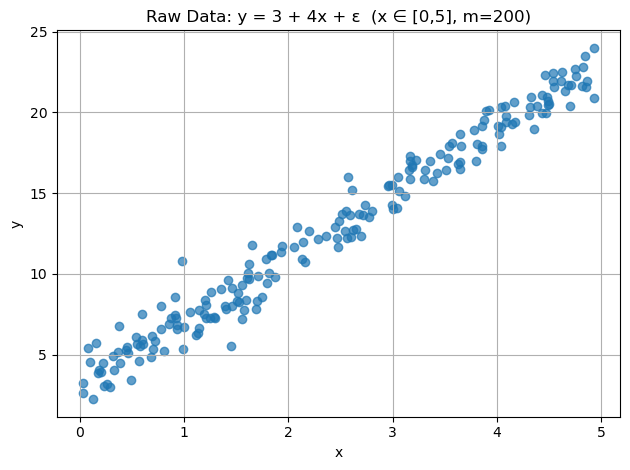

In [2]:

m = 200
x = np.random.uniform(0.0, 5.0, size=m)
epsilon = np.random.normal(0.0, 1.0, size=m)
y = 3.0 + 4.0 * x + epsilon

# Design matrix with bias column of 1s
X = np.c_[np.ones(m), x]

# Raw scatter
plt.figure()
plt.scatter(x, y, alpha=0.7)
plt.title("Raw Data: y = 3 + 4x + ε  (x ∈ [0,5], m=200)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.tight_layout()
plt.show()


## 2) Closed‑form solution (Normal Equation)

In [3]:

theta_closed = np.linalg.inv(X.T @ X) @ (X.T @ y)
b0_closed, b1_closed = theta_closed
print(f"Closed-form (Normal Eqn)  b0={b0_closed:.4f},  b1={b1_closed:.4f}")


Closed-form (Normal Eqn)  b0=3.1052,  b1=3.9844


## 3) Gradient Descent (from scratch)

In [4]:

def mse(X, y, theta):
    r = X @ theta - y
    return (r @ r) / len(y)

def gradient_descent(X, y, theta0, lr=0.05, n_iters=1000):
    m = len(y)
    theta = theta0.astype(float).copy()
    history = []
    for _ in range(n_iters):
        grad = (2.0/m) * (X.T @ (X @ theta - y))
        theta -= lr * grad
        history.append(mse(X, y, theta))
    return theta, np.array(history)

theta0 = np.zeros(2)
eta = 0.05
n_iters = 1000
theta_gd, loss_hist = gradient_descent(X, y, theta0, eta, n_iters)
b0_gd, b1_gd = theta_gd
print(f"Gradient Descent          b0={b0_gd:.4f},  b1={b1_gd:.4f}  (η={eta}, iters={n_iters})")


Gradient Descent          b0=3.1052,  b1=3.9844  (η=0.05, iters=1000)


## 4) Plot: raw data + both fitted lines

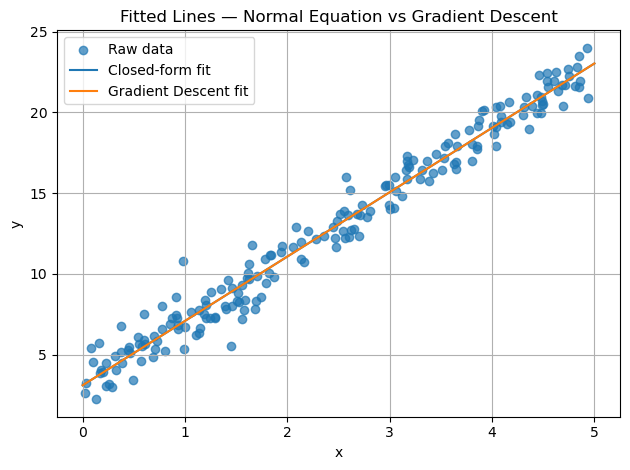

In [5]:

x_line = np.linspace(0.0, 5.0, 300)
X_line = np.c_[np.ones_like(x_line), x_line]
y_closed = X_line @ theta_closed
y_gd = X_line @ theta_gd

plt.figure()
plt.scatter(x, y, alpha=0.7, label="Raw data")
plt.plot(x_line, y_closed, label="Closed-form fit")
plt.plot(x_line, y_gd, label="Gradient Descent fit")
plt.title("Fitted Lines — Normal Equation vs Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 5) Loss curve (MSE vs iterations)

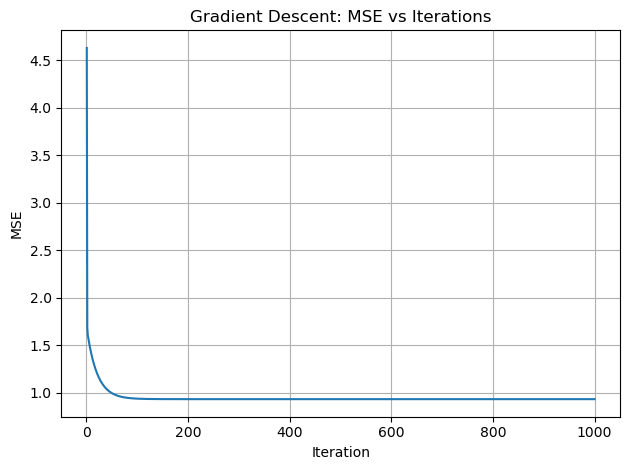

In [6]:

plt.figure()
plt.plot(np.arange(1, n_iters+1), loss_hist)
plt.title("Gradient Descent: MSE vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.tight_layout()
plt.show()



## 6) Short commentary (2–3 sentences)

Gradient Descent converges to the same parameters as the closed‑form method; the fitted lines overlap visually.  
The MSE curve decreases smoothly and plateaus, indicating stable convergence with \(Teta=0.05\) over 1000 iterations.
